In [1]:
%matplotlib inline
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
pd.options.display.max_colwidth = 100

In [3]:
df = pd.read_csv('compounds.csv',header = None)
print(df);

                                                                                                       0  \
0                                                                                                 266487   
1                     I just had an astounding realisation. You’re like the male version of Rory Gilmore   
2    Here’s what I learnt during university days:\n\n1. Grades don’t matter\n2. Take any extra course...   
3                                                                                            Thank you!!   
4    The Harvard isn't great but it's the people refers to Swimmer's Body Illusion which is true. You...   
5                                         John this video is so good, thank you♡♡♡ kisses from Argentina   
6                     You're a great inspiration John, I love watching your videos. Love from Sweden🇸🇪❤❤   
7    The people who are likely not to make it in life are the ones here  commenting on him not blinki...   
8                           

In [4]:
view_stats = df.iloc[0,:]

In [5]:
print("so we have " + str(view_stats[0]) +" view counts, "+str(view_stats[1])+" likes, "+str(view_stats[2])+" dislikes. ")

so we have 266487 view counts, 13720.0 likes, 208 dislikes. 


We can also try to see how it looks like by creating a pie-chart

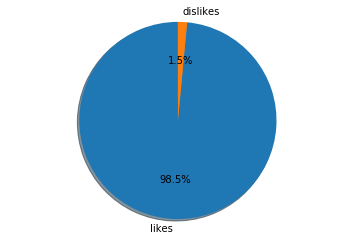

In [9]:
labels = 'likes', 'dislikes'
sizes = [view_stats[1], view_stats[2]]
explode = (0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

So the chart above can present **visualisation** of how likeable our video is.

In [10]:
df = df.drop(0)


In [11]:
df = df.rename(columns = {0:'text',1:'score',2:'likecount'})

In [12]:
df = df.reset_index(drop = True)

In [13]:
def Clean_Text(text):
    """
    text: input for the text
    Disclaimer:
    This is a ongoing cleaning function
    """

    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"he's","he is ",text)
    text = re.sub(r"she's","she is ",text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(r'[^\w\s]','',text)
    text = text.strip(' ')
    return text


In [14]:
df['clean_text'] = df['text'].map(lambda com:Clean_Text(com))

In [15]:
df.head(10)


,text,score,likecount,clean_text
0,I just had an astounding realisation. You’re like the male version of Rory Gilmore,0.6486,0,i just had an astounding realisation you re like the male version of rory gilmore
1,Here’s what I learnt during university days:\n\n1. Grades don’t matter\n2. Take any extra course...,0.4588,1,here s what i learnt during university days 1 grades don t matter 2 take any extra courses altho...
2,Thank you!!,0.4738,0,thank you
3,The Harvard isn't great but it's the people refers to Swimmer's Body Illusion which is true. You...,0.7272,0,the harvard is not great but it the people refers to swimmer body illusion which is true you sho...
4,"John this video is so good, thank you♡♡♡ kisses from Argentina",0.8696,0,john this video is so good thank you kisses from argentina
5,"You're a great inspiration John, I love watching your videos. Love from Sweden🇸🇪❤❤",0.9509,1,you are a great inspiration john i love watching your videos love from sweden
6,The people who are likely not to make it in life are the ones here commenting on him not blinki...,0.0258,1,the people who are likely not to make it in life are the ones here commenting on him not blinkin...
7,"Thanks for sharing this with us , that was helpful",0.8176,1,thanks for sharing this with us that was helpful
8,What other than the people would a university be. Buildings don’t matter. But faculty and friend...,0.4939,0,what other than the people would a university be buildings don t matter but faculty and friends ...
9,How can I get into harward?,0.0000,0,how can i get into harward


So now since we have `cleaned text`, we are going to try use NLTK again to see the new score.

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sid
sid = sid()
df['clean_text_score'] = df['clean_text'].map(lambda com:sid.polarity_scores(com)['compound'])

/home/abhijeet/anaconda3/lib/python3.5/site-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



In [17]:
df.head(3)

,text,score,likecount,clean_text,clean_text_score
0,I just had an astounding realisation. You’re like the male version of Rory Gilmore,0.6486,0,i just had an astounding realisation you re like the male version of rory gilmore,0.6486
1,Here’s what I learnt during university days:\n\n1. Grades don’t matter\n2. Take any extra course...,0.4588,1,here s what i learnt during university days 1 grades don t matter 2 take any extra courses altho...,0.7226
2,Thank you!!,0.4738,0,thank you,0.3612


In [18]:
df_like_ranking = df.sort_values('likecount',ascending = False)

In [19]:
df_like_ranking.head(10)

,text,score,likecount,clean_text,clean_text_score
507,You're not blinking,0.0000,1577,you are not blinking,0.0000
487,You are my most favourite youtuber. If I could give you one tip that would be to live your eyes ...,0.3612,953,you are my most favourite youtuber if i could give you one tip that would be to live your eyes s...,0.3612
428,"Guys, number 5 is KEY. You gotta surround yourself with success minded people. I am 32. Even tho...",0.9584,765,guys number 5 is key you gotta surround yourself with success minded people i am 32 even though ...,0.9584
446,I can attest that he does blink regularly in real life. Excellent reflection and thanks for the ...,0.7650,532,i can attest that he does blink regularly in real life excellent reflection and thanks for the s...,0.7650
316,John you should be on TED talk,0.0000,524,john you should be on ted talk,0.0000
340,1. School doesn’t matter that much(to Him)- 0:11\n2. Prioritising time is hard - 1:38\n3. Help ...,0.4404,440,1 school doesn t matter that much to him 0 11 2 prioritising time is hard 1 38 3 help people wit...,0.4404
464,He’s so humble for a Harvard student,0.0000,256,he s so humble for a harvard student,0.0000
493,"Could you make a video of you favourite books you've read so far, regardless of the genre?",0.0000,242,could you make a video of you favourite books you have read so far regardless of the genre,0.0000
423,*YOU'RE SO INSPIRING*,0.0000,155,you are so inspiring,0.5598
505,i definitely wish i learned that school doesn't matter that much when i was younger!! the 80/20 ...,0.9644,117,i definitely wish i learned that school does not matter that much when i was younger the 80 20 r...,0.9581


If you wanna know **all** the likecount in a decending order ,just remove the `#` in the next chuck and it will show you the result.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 5 columns):
text                513 non-null object
score               513 non-null float64
likecount           513 non-null int64
clean_text          513 non-null object
clean_text_score    513 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 20.1+ KB


In [21]:
def pick_up_comments(data,score,threshold):
    """
    This function take three inputs:
    - data :dataframe
    - score : score you wannt to examine,input requires to be in [-1,1]. For negative numbers it will run scores no greater than the input,for positve
        numbers it will find scores no smaller than the input.
    - likecount : postive interger input required.
    
    """
    
    if score > 0:
        df =  data.loc[(df_like_ranking["clean_text_score"] >= score) & (df_like_ranking["likecount"] >= threshold)].sort_values(['likecount', 'score'],ascending=[False, False])
        return df
    elif score <= 0:
        df =  data.loc[(df_like_ranking["clean_text_score"] <= score) & (df_like_ranking["likecount"] >= threshold)].sort_values(['likecount', 'score'],ascending=[False, True])
        return df
              

----

Here is just a part we are going to use the function to see how the `clean_text_score` interact with likecount.
You can change the number for your own analysis.

In [22]:
pick_up_comments(df_like_ranking,0.8,50)

,text,score,likecount,clean_text,clean_text_score
428,"Guys, number 5 is KEY. You gotta surround yourself with success minded people. I am 32. Even tho...",0.9584,765,guys number 5 is key you gotta surround yourself with success minded people i am 32 even though ...,0.9584
505,i definitely wish i learned that school doesn't matter that much when i was younger!! the 80/20 ...,0.9644,117,i definitely wish i learned that school does not matter that much when i was younger the 80 20 r...,0.9581


In [23]:
pick_up_comments(df_like_ranking,-0.5,50)

,text,score,likecount,clean_text,clean_text_score


In [24]:
pick_up_comments(df_like_ranking,-0.4,50)

,text,score,likecount,clean_text,clean_text_score


In [25]:
pick_up_comments(df_like_ranking,-0.6,20)

,text,score,likecount,clean_text,clean_text_score


# Histogram of the score

In [26]:
from scipy.stats import kurtosis
doanes = lambda data: int(1 + np.log(len(data)) + np.log(1 +  kurtosis(data) * (len(data)/6.)** 0.5))

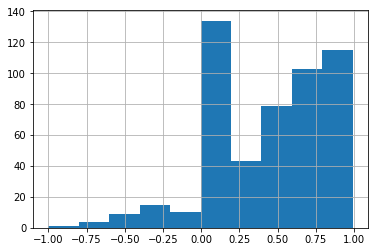

In [27]:
df_like_ranking.clean_text_score.hist()

# Histogram of the score

In [28]:
from scipy.stats import kurtosis
doanes = lambda data: int(1 + np.log(len(data)) + np.log(1 +  kurtosis(data) * (len(data)/6.)** 0.5))

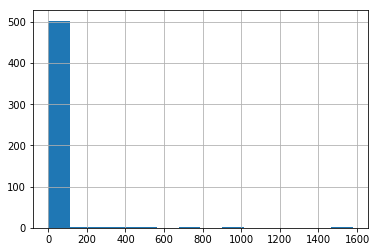

In [29]:
df_like_ranking.likecount.hist(bins = doanes(df_like_ranking["likecount"]))

maybe try to plot scatter points betweeen `likecounts` and `clean_text_score`.

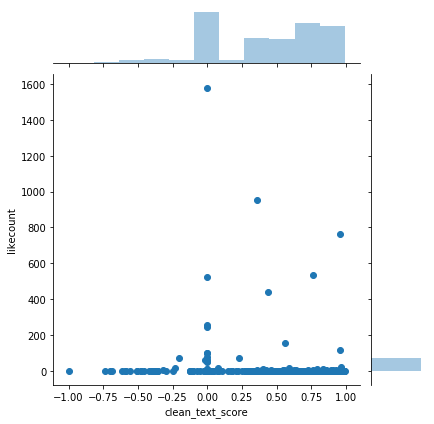

In [30]:
sns.jointplot(x="clean_text_score", y="likecount", data=df_like_ranking)